In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_regression

# Autoreload of the files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
path = 'data'

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [20]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

# Exercice for feature selection
### Feature selection - Pearson's correlation
***

In [21]:
# Feature selection using pearson's correlation
correlations = X.corrwith(y)

In [22]:
# Ordering correlation coefficients
correlations = correlations.abs().sort_values(ascending=False)
print(correlations)

worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0.067016
mean fractal dimension     0

/var/folders/dc/28gdnyt16qg7f_cvxzb49rxc0000gn/T/ipykernel_21553/1956680217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='RdYlBu')


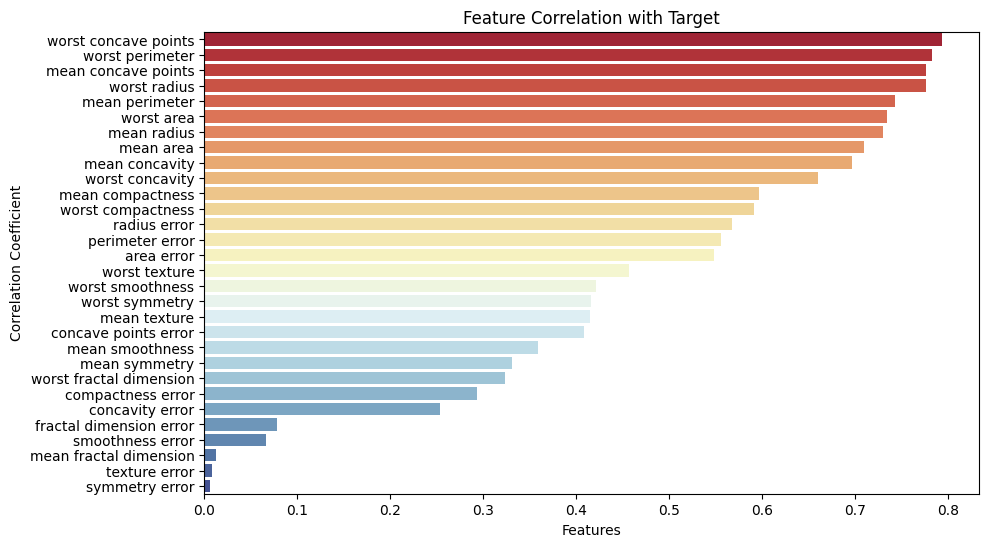

Index(['mean smoothness', 'mean concave points', 'mean fractal dimension',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'worst smoothness', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')


In [47]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='RdYlBu')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.title('Feature Correlation with Target')
plt.show()
print(X.columns[selector.support_])


worst perimeter            0.476561
worst area                 0.464118
worst radius               0.454237
mean concave points        0.436218
worst concave points       0.432116
mean perimeter             0.403468
mean concavity             0.370097
mean radius                0.367310
mean area                  0.358876
area error                 0.335506
worst concavity            0.312236
perimeter error            0.268989
radius error               0.244599
worst compactness          0.226541
mean compactness           0.214662
concave points error       0.135533
worst texture              0.117821
concavity error            0.112749
mean texture               0.098326
worst smoothness           0.096465
worst symmetry             0.090274
mean smoothness            0.084072
compactness error          0.074241
mean symmetry              0.071101
worst fractal dimension    0.068272
fractal dimension error    0.035568
smoothness error           0.019953
symmetry error             0

/var/folders/dc/28gdnyt16qg7f_cvxzb49rxc0000gn/T/ipykernel_21553/149439567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mutual_infos.values, y=mutual_infos.index, palette='RdYlBu')


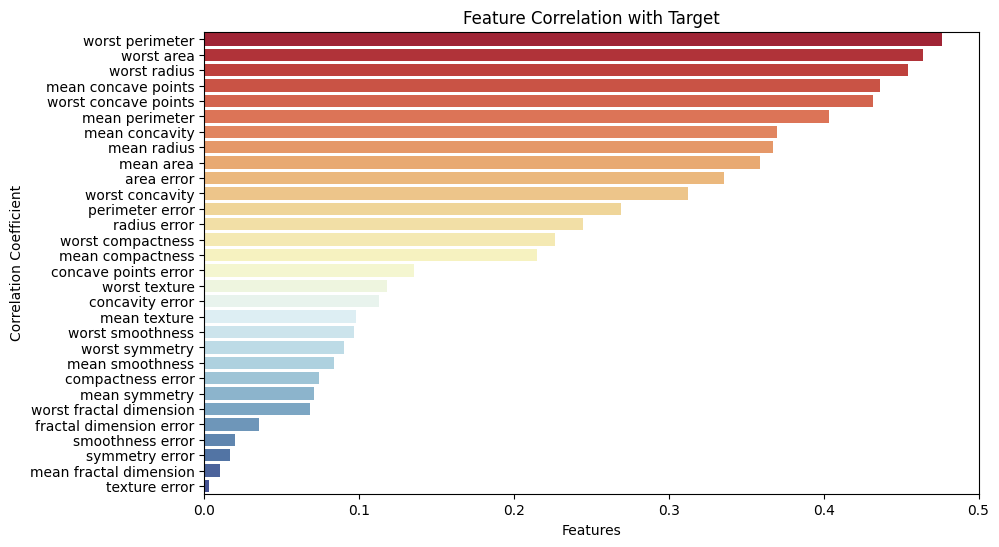

Index(['mean smoothness', 'mean concave points', 'mean fractal dimension',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'worst smoothness', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')


In [ ]:
mutual_infos = mutual_info_regression(X, y)
mutual_infos = pd.Series(mutual_infos, index=X.columns).sort_values(ascending=False)
print(mutual_infos)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mutual_infos.values, y=mutual_infos.index, palette='RdYlBu')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.title('Feature Correlation with Target')
plt.show()

Index(['mean smoothness', 'mean concave points', 'mean fractal dimension',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'worst smoothness', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

In [39]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 4, step = 1)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

[False  True  True  True  True False False False False False]
[2 1 1 1 1 3 4 7 6 5]


In [33]:
X.shape

(50, 10)

In [34]:
y

array([17.2134918 , 19.37965436, 14.75030901, 11.81662128,  9.45520588,
       13.90806032,  3.40447398, 24.20228984, 17.5783377 , 17.51556532,
       17.40999895, 17.11893656, 21.81510702, 15.88623898, 21.63246599,
       13.01689624, 22.908266  ,  6.84202611, 10.32969753, 17.70617001,
        8.52251585,  9.51592807, 19.81663198,  2.99416378,  8.04688453,
       22.09060713, 18.07976383, 15.64717616,  9.18985112,  8.10886643,
       11.46237964, 11.27510587,  9.39472899, 19.12963765,  6.75303583,
        8.59450992, 14.08547252, 15.47556192, 23.37684908, 10.65602456,
       26.21981092,  7.56662861,  6.09081028, 15.3507226 , 13.30251573,
       15.05111884, 12.18062778, 23.69853054,  7.89988206, 14.86941989])

In [40]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [43]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 10, step = 1)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

[False False False False  True False False  True False  True False False
 False False  True  True  True  True False False False False False False
  True False False False  True  True]
[12 19 13 21  1  2  7  1  5  1  6 16  9 18  1  1  1  1  8 11 10 15 17 20
  1 14  3  4  1  1]


In [ ]:
X.columns[selector.support_]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean symmetry', 'radius error',
       'texture error', 'perimeter error', 'area error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst compactness', 'worst concavity',
       'worst concave points'],
      dtype='object')